<a href="https://colab.research.google.com/github/Poorvigupta1013/Placement-Prediction-Data-Analytics-Project/blob/main/Project_1_Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [592]:
#  Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [593]:
#  Load Dataset
df = pd.read_csv("/content/college_student_placement_dataset.csv")
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [594]:
# View first 5 rows
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [595]:
# Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [596]:
# display a statistical summary of data within the DataFrame
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [597]:
# returns the total no.of elements
df.size

100000

In [598]:
# check the nullvalue
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [599]:
# returns a datatype
df.dtypes

,0
College_ID,object
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,object
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,object


In [600]:
import seaborn as sns
def outliers(x):
  y=x.select_dtypes(include=[int,float])
  for i in y:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

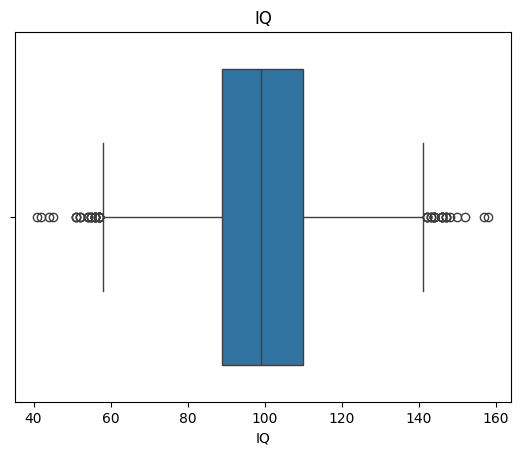

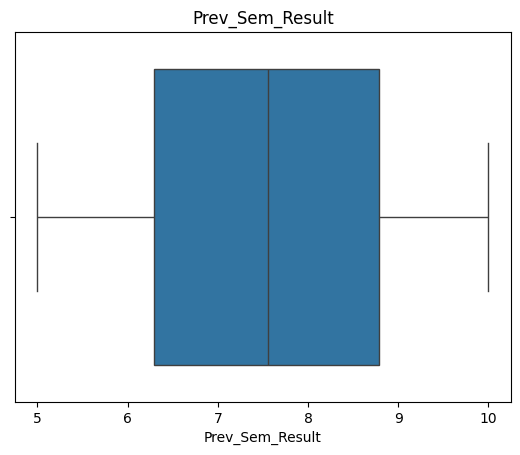

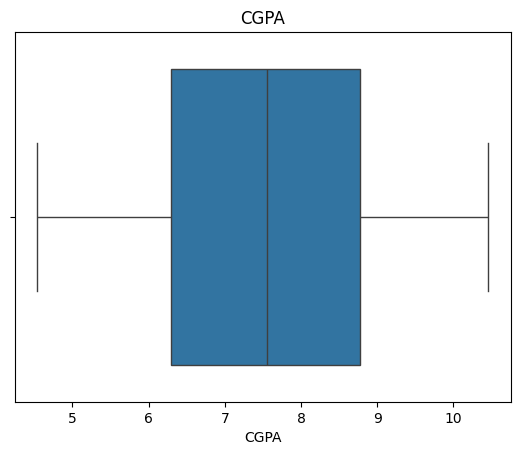

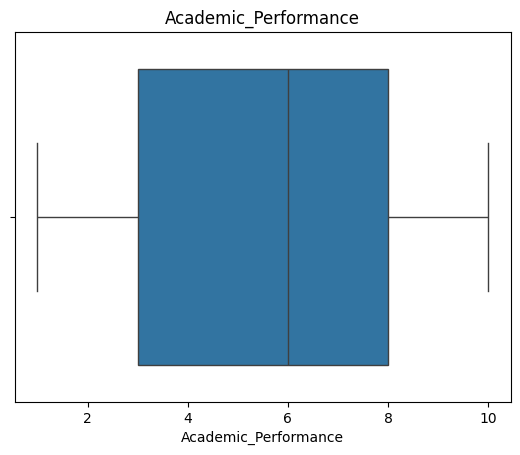

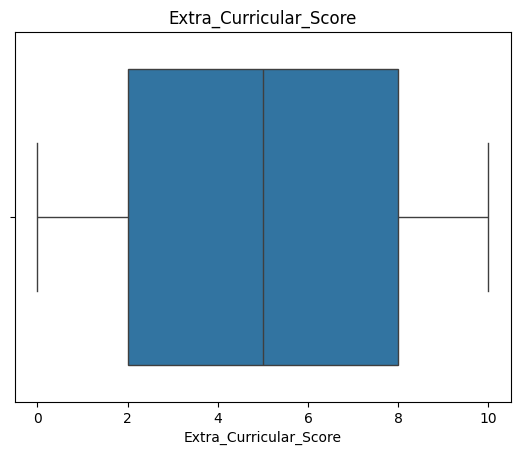

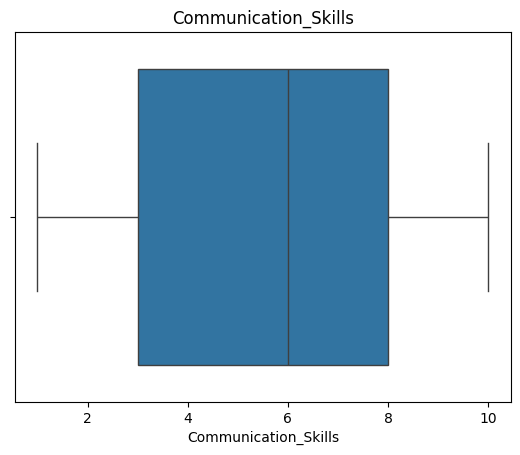

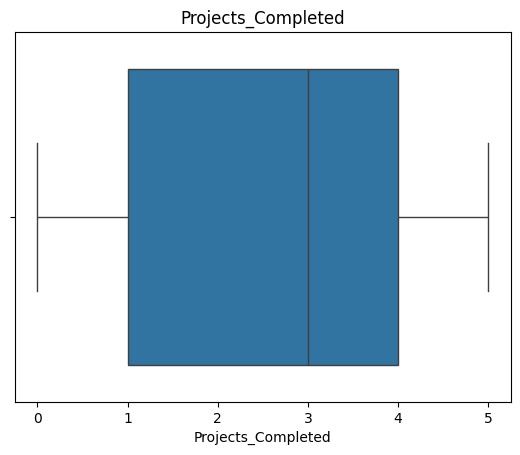

In [601]:
outliers(df)

In [602]:
for i in df.select_dtypes([int,float]):
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lf=q1-(1.5*iqr)
  uf=q3+(1.5*iqr)
  df[i]=df[i].clip(lower=lf,upper=uf)

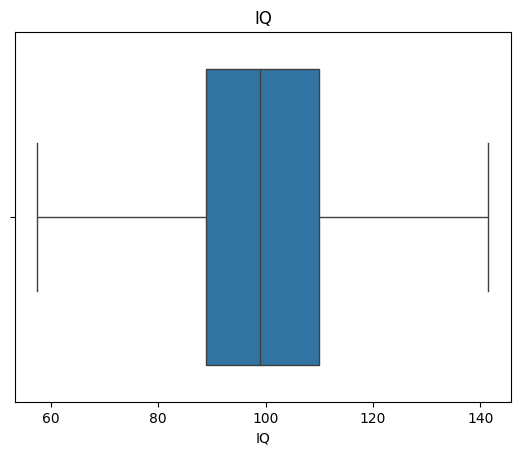

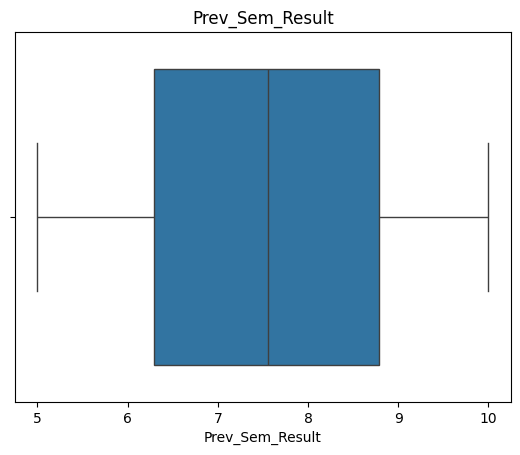

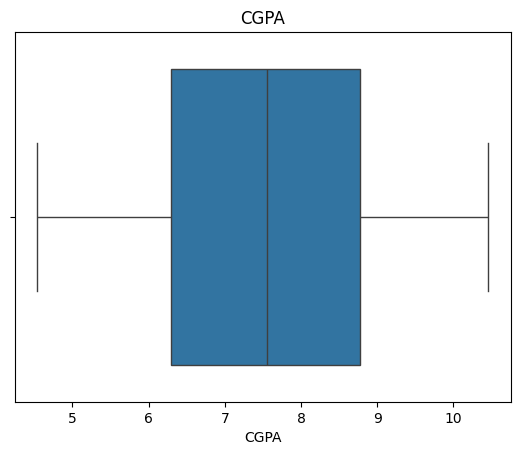

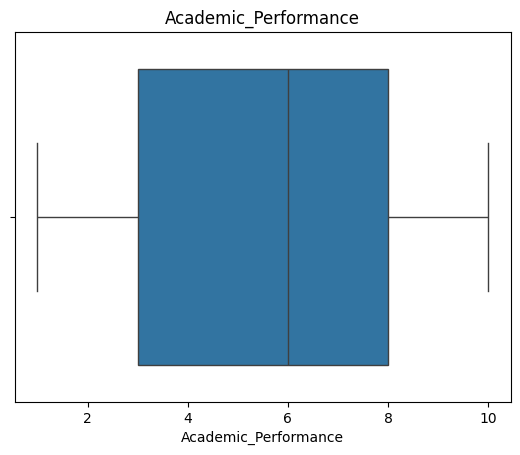

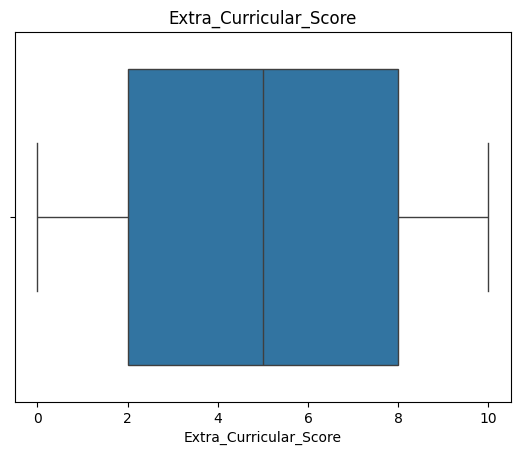

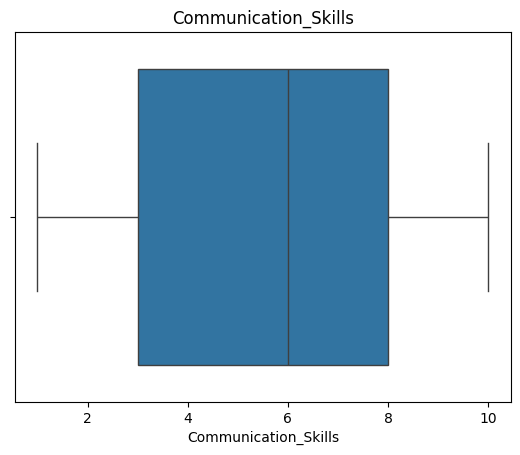

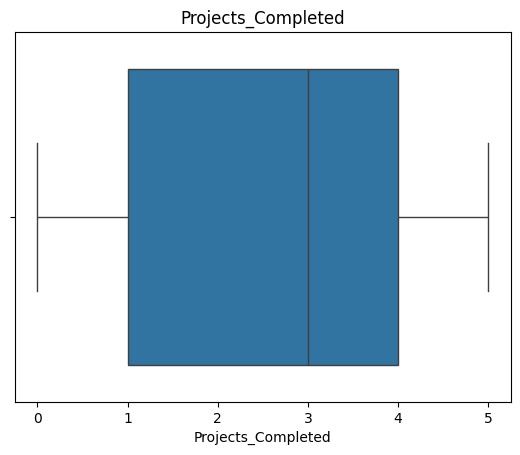

In [603]:
outliers(df)

In [604]:
# Convert Categorical Columns into numerical by using Label Encoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


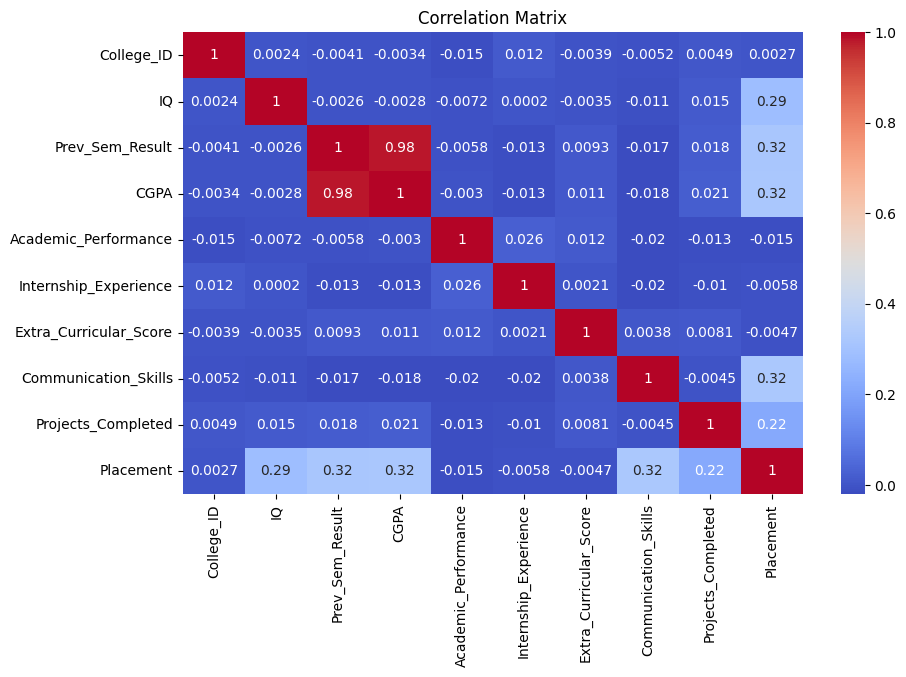

In [605]:
# Correlation Check
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [606]:
# Feature Selection and Splitting
X = df.drop("Placement", axis=1)  # Dropping the target variable from features
y = df["Placement"]

In [607]:
from sklearn.ensemble import RandomForestClassifier # import RandomForest Libraries
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [608]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [609]:
#  Train a Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [610]:
print("Train",model.score(X_train,y_train))
print("Test",model.score(X_test,y_test))

Train 1.0
Test 1.0


In [611]:
#  Prediction
y_pred = model.predict(X_test)

In [612]:
#  Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) # Confusion matrix : Helps evaluate true/false positives and negatives.

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1674    0]
 [   0  326]]


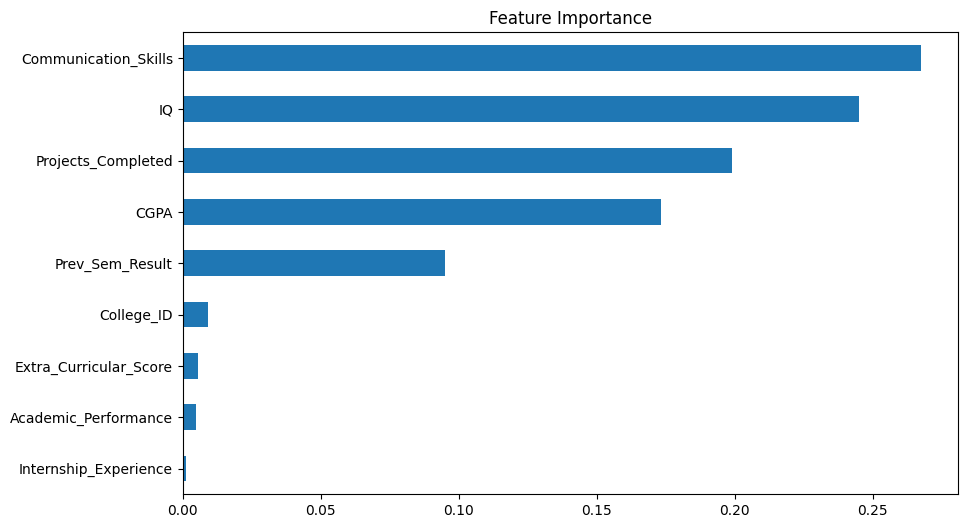

In [613]:
#  Feature Importance :Shows which features influence placement most
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()

<Axes: xlabel='Placement', ylabel='count'>

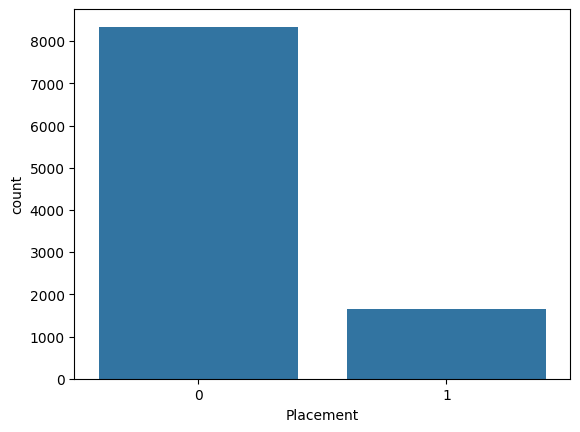

In [615]:
# Countplot for Placement Status
import seaborn as sns
sns.countplot(x='Placement', data=df)


<Axes: xlabel='Internship_Experience', ylabel='count'>

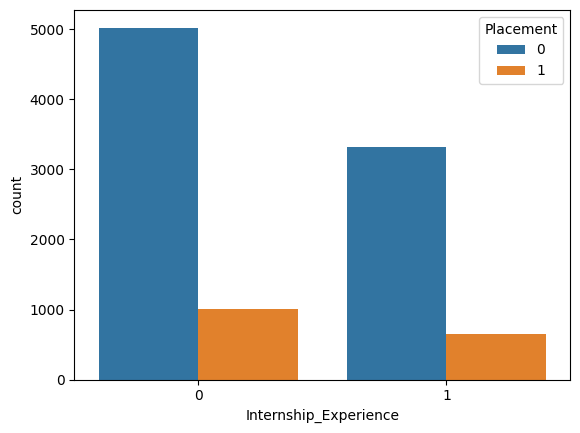

In [620]:
#Count Plot by Internship Experience vs Placement
sns.countplot(x='Internship_Experience', hue='Placement', data=df)

<Axes: ylabel='count'>

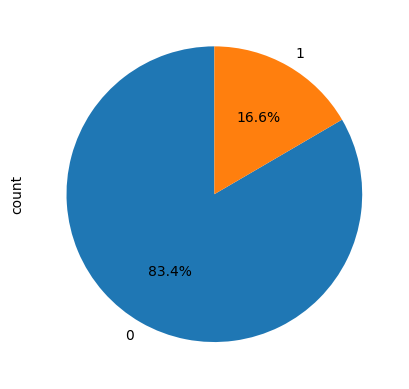

In [629]:
# Pie Chart: Placement Ratio
df['Placement'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)